In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import librosa.display

In [2]:
!pip install kaggle


In [3]:
mkdir ~/.kaggle

In [4]:
with open('/content/kaggle.json', 'w') as f:
    f.write('{"username":"apoorvbs9","key":"bfeb1b35810301346ed10a4e4f9c8ee9"}')

In [5]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets download jonathanoheix/face-expression-recognition-dataset
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

 97% 417M/428M [00:20<00:00, 25.7MB/s]
100% 428M/428M [00:20<00:00, 22.0MB/s]


In [6]:
!unzip /content/toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
del paths[0]
del labels[0]

In [9]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_ring_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_fat_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_turn_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_shall_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_cab_ps.wav']

In [10]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [11]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [12]:
df['label'].value_counts()


fear       400
neutral    400
disgust    400
angry      400
sad        400
happy      400
ps         399
Name: label, dtype: int64

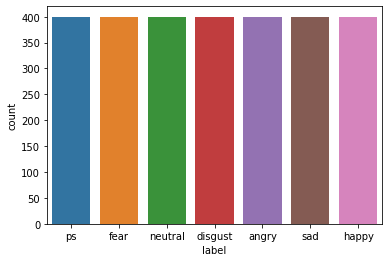

In [13]:
sns.countplot(df['label'])

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

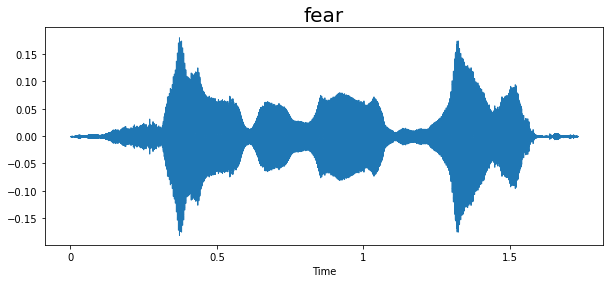

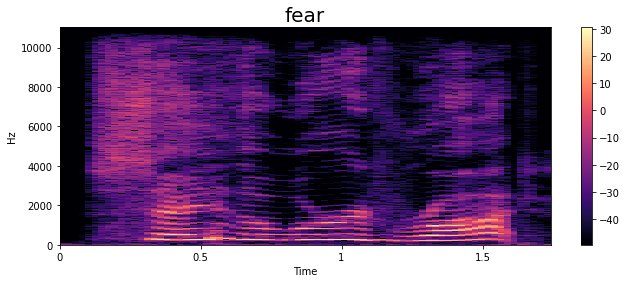

In [15]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

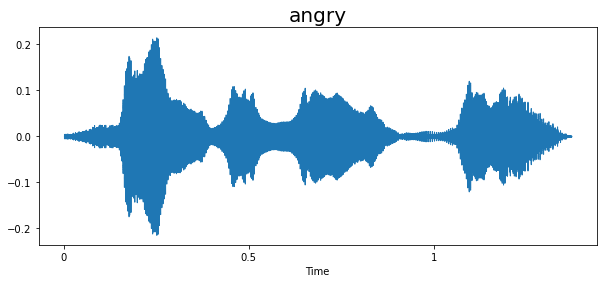

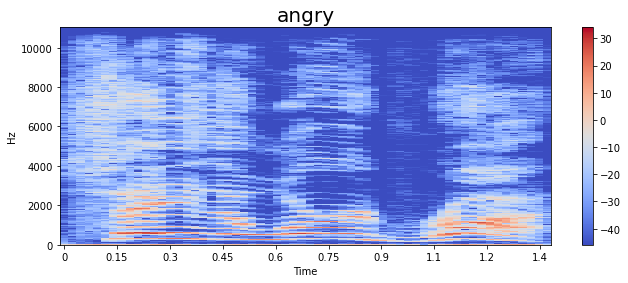

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

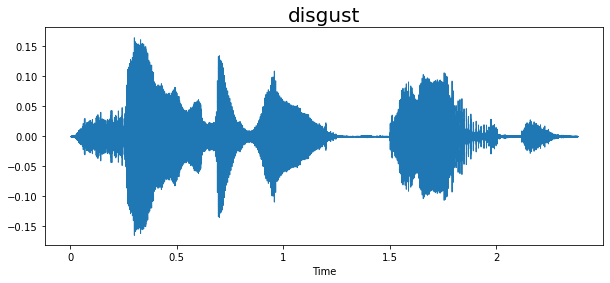

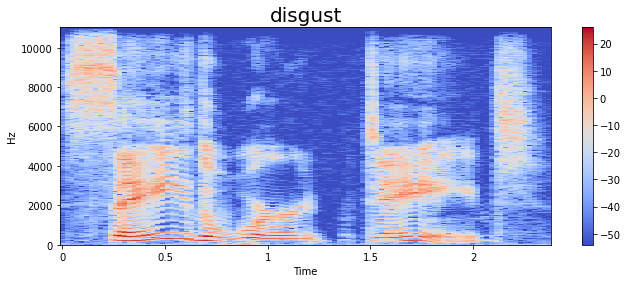

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

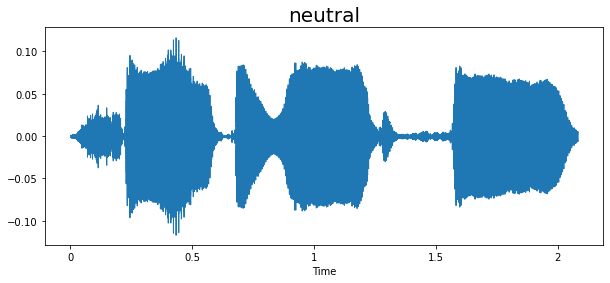

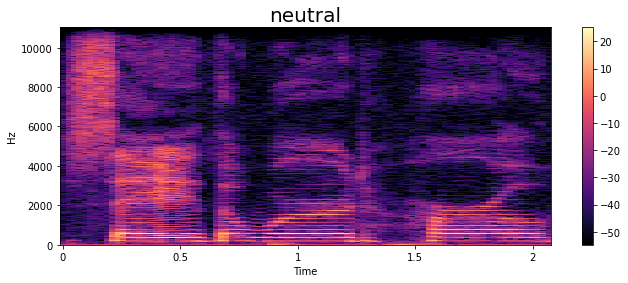

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

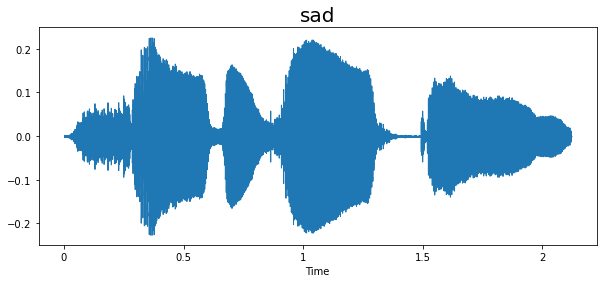

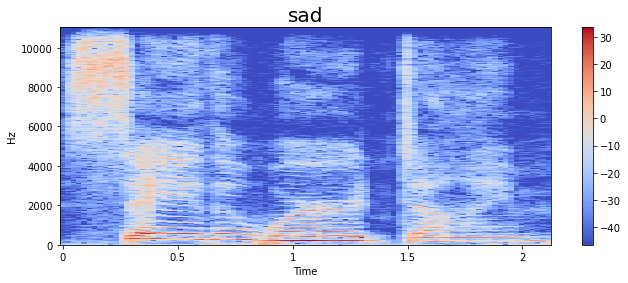

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

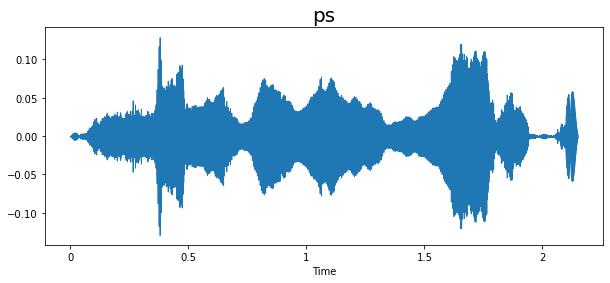

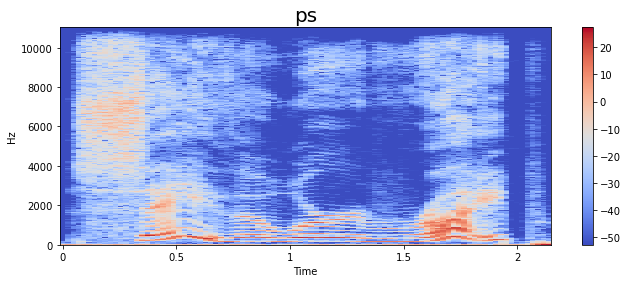

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

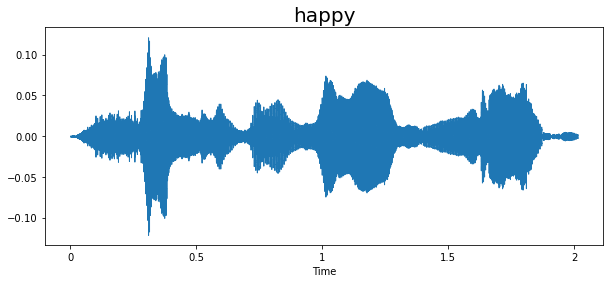

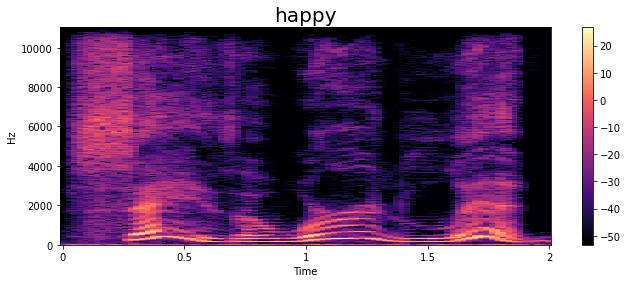

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


## Feature Extraction


In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-4.27722961e+02,  1.20229774e+02,  1.99739494e+01, -1.82702656e+01,
        9.45507145e+00,  3.09684247e-01, -2.13193893e-01, -8.04856491e+00,
       -1.47691231e+01, -1.56705542e+01, -2.16903324e+01, -1.01081123e+01,
       -1.25373135e+01, -4.90735435e+00, -2.23084569e+00,  3.33045435e+00,
       -4.18241835e+00,  9.43441868e+00,  4.72036839e+00,  8.96722603e+00,
       -3.66059840e-01,  6.53522778e+00, -9.04610062e+00,  6.40669250e+00,
       -4.48503208e+00,  4.08057022e+00, -7.15267038e+00, -2.23572135e+00,
       -8.45658302e+00,  3.33122802e+00, -7.50944853e-01,  3.53548026e+00,
        5.43431902e+00,  6.19293928e+00,  1.32311010e+01,  1.24160299e+01,
        1.19927025e+01,  1.60328865e+01,  1.67913685e+01,  1.62433128e+01],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [19]:
X_mfcc


0       [-427.72296, 120.229774, 19.97395, -18.270266,...
1       [-499.4934, 98.790924, -7.152204, -15.300849, ...
2       [-440.4976, 119.53584, 6.344519, -28.013643, 1...
3       [-386.01816, 95.81431, 1.3033075, -4.5083313, ...
4       [-436.68167, 112.86651, -4.8362775, -11.39248,...
                              ...                        
2794    [-411.50113, 99.33176, 28.23261, 44.903625, 0....
2795    [-368.1616, 97.56494, 16.910944, 33.78375, -1....
2796    [-407.07138, 64.16688, 19.232225, 42.707256, -...
2797    [-417.60672, 82.96662, 34.409843, 47.08472, -1...
2798    [-412.5187, 104.66377, 35.54567, 24.58285, -13...
Name: speech, Length: 2799, dtype: object

In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2799, 40)

In [21]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2799, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y = y.toarray()
y.shape

(2799, 7)

## Create the LSTM Model


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [25]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 8s 23ms/step - loss: 1.0710 - accuracy: 0.6195 - val_loss: 2.5788 - val_accuracy: 0.1393
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.3296 - accuracy: 0.8906 - val_loss: 2.4026 - val_accuracy: 0.2643
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1982 - accuracy: 0.9384 - val_loss: 2.0787 - val_accuracy: 0.4321
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1625 - accuracy: 0.9433 - val_loss: 1.7229 - val_accuracy: 0.4821
Epoch 5/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1051 - accuracy: 0.9692 - val_loss: 2.0392 - val_accuracy: 0.5179
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1398 - accuracy: 0.9585 - val_loss: 2.7391 - val_accuracy: 0.4143
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1025 - accuracy: 0.9683 - val_loss: 3.5534 - val_accuracy: 0.3500
Epoch 8/50
35/35 [=

In [ ]:
# best val accuracy: 64.11%
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot Results

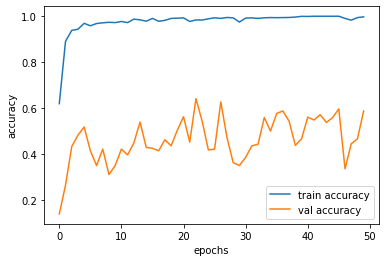

In [26]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

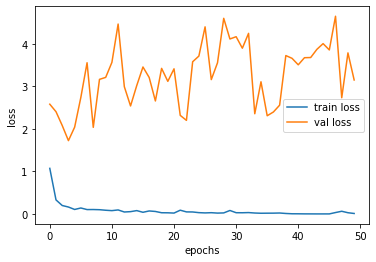

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()